In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ortho_group
from procrustes import orthogonal
from procrustes import orthogonal_2sided
import cv2 as cv2
import matplotlib.pyplot as plt

In [2]:
path = './dataFolder/AffineTransformation/'

In [3]:
img1 = cv2.imread(path + 'M3_1/M3_ventHW_full.png',0)          # ref Image
pt1_file = pd.read_csv(path + 'M3_1/Results.csv')
sensor1 = pd.read_csv(path + 'M3_1/M3_ventHW_fullconvert.csv')


img2 = cv2.imread(path + 'M13_2/m13right_ventHW_full.png',0)   # Image 1
pt2_file = pd.read_csv(path + 'M13_2/Results.csv')
sensor2 = pd.read_csv(path + 'M13_2/m13right_ventHW_fullconvert.csv')

In [4]:
pts_img1 = np.array(list(zip(pt1_file.X.values,pt1_file.Y.values)))
pts_img2 = np.array(list(zip(pt2_file.X.values, pt2_file.Y.values)))

In [95]:
s1 = sensor1.iloc[:,2:4].values
s2 = sensor2.iloc[:,2:4].values

In [96]:
s2

array([[10267, 10658],
       [10246, 10660],
       [12328,  8793],
       [12295,  8787],
       [13552,  7030],
       [13514,  7024],
       [14234,  5262],
       [14277,  5259],
       [14565,  3830],
       [14523,  3829],
       [14855,  2501],
       [14891,  2500],
       [15039,  1147],
       [15080,  1148],
       [13928,   317],
       [13973,   319]])

In [80]:
# s2 = np.concatenate([s2, np.zeros((len(s1)-len(s2),2))])

In [81]:
# pts1 = np.concatenate([pts_img1, s1])
# pts2 = np.concatenate([pts_img2, s2])

In [83]:
# len(pts1),len(s1),len(pts_img1)
# w2 = np.zeros((len(s1),1)).squeeze()
# w1 = np.ones((len(pts_img1),1)).squeeze()
# w = np.concatenate([w1, w2])

In [84]:
# w

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

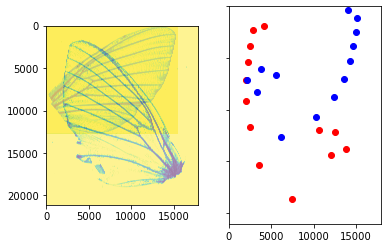

In [85]:
f, ax = plt.subplots(1,2, sharex = True, sharey = True)
ax = ax.ravel()

ax[0].imshow(img2, alpha = 0.5)
ax[0].imshow(img1, alpha = 0.5)

ax[1].scatter(pts_img1[:,0], pts_img1[:,1], c = 'red')
ax[1].scatter(pts_img2[:,0], pts_img2[:,1], c = 'blue')
# ax[1].get_gca().invert_yaxis()

In [97]:
# orthogonal Procrustes analysis with translation
# pad_mode = "row"
result = orthogonal(pts_img1, pts_img2, scale=True, translate=True)

In [98]:
result

 error: 0.002618562073264498
 new_a: array([[-0.07757777, -0.32493913],
       [-0.13029446, -0.30761238],
       [-0.14469592, -0.24575159],
       [-0.15549701, -0.18159965],
       [-0.16335235, -0.11253812],
       [-0.16482523, -0.02711131],
       [-0.14289574,  0.07631733],
       [-0.1016552 ,  0.22753261],
       [ 0.05987021,  0.36262808],
       [ 0.26590922,  0.09423732],
       [ 0.18784678,  0.08932773],
       [ 0.2482347 ,  0.18801044],
       [ 0.31893276,  0.16149867]])
 new_b: array([[ 0.18675327, -0.27376029],
       [ 0.23879205, -0.2354368 ],
       [ 0.22955523, -0.17161872],
       [ 0.21360071, -0.11031979],
       [ 0.19876581, -0.04192995],
       [ 0.16704337,  0.04054838],
       [ 0.11087601,  0.12134728],
       [ 0.01123024,  0.2103567 ],
       [-0.17891775,  0.30309816],
       [-0.29013287, -0.00591566],
       [-0.20952057,  0.0202087 ],
       [-0.31028595,  0.09783536],
       [-0.36775954,  0.04558664]])
     s: None
     t: array([[-0.93302031, -

In [99]:
transformed_mat = np.dot(result.new_a, result.t)
transformed_mat

array([[ 0.18930244, -0.27526049],
       [ 0.23225361, -0.24012556],
       [ 0.22343148, -0.1772262 ],
       [ 0.21042573, -0.11348465],
       [ 0.19290494, -0.04622231],
       [ 0.16354057,  0.03401262],
       [ 0.10586384,  0.12262289],
       [ 0.01297474,  0.2488705 ],
       [-0.18634231,  0.31679665],
       [-0.28200752, -0.00775511],
       [-0.2074071 ,  0.01575286],
       [-0.29925863,  0.08609682],
       [-0.35568179,  0.03592197]])

In [100]:
rot = result.t
z = np.zeros((2,1))
rot = np.append(rot, z, axis = 1) 
rot = np.append(rot, [[0,0,0]], axis=0)
# rot = np.append(rot, [[0,0,0]], axis = 1)
rot

array([[-0.93302031, -0.35982371,  0.        ],
       [-0.35982371,  0.93302031,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [101]:
from scipy.spatial.transform import Rotation   

## first transform the matrix to euler angles
r =  Rotation.from_matrix(rot)
angles = r.as_euler("zyx",degrees=True)

In [102]:
angles

array([151.80948624,   0.        , 180.        ])

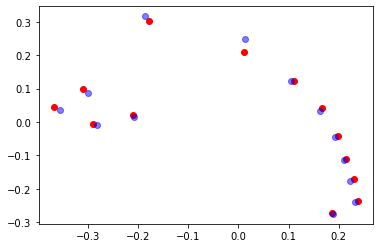

In [103]:
import matplotlib.pyplot as plt
plt.scatter(result.new_b[:,0], result.new_b[:,1], c='red')
plt.scatter(transformed_mat[:,0], transformed_mat[:,1], c= 'blue', alpha = 0.5)

In [168]:
# translate the test matrix wrt to ref matrix
s1_trans = s1 - np.average(pts_img1, axis = 0)
s2_trans = s2 - np.average(pts_img2, axis = 0)

# scale to reference matrix
# scaling factor to match unit sphere
s1_scale = s1_trans * 1.0 / np.linalg.norm(pts_img1)
s2_scale = s2_trans * 1.0 / np.linalg.norm(pts_img2)

s1_final = np.dot(s1_scale,result.t)

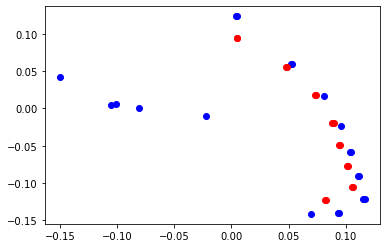

In [169]:
plt.scatter(s1_final[:,0], s1_final[:,1], c = 'blue')
# plt.show()
plt.scatter(s2_scale[:,0], s2_scale[:,1], c = 'red')

In [ ]:
np.linalg.norm(s1_final), np.linalg.norm(s2_scale)